In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

In [198]:
data = pd.read_csv('movie_bd_v5.csv')
#data.sample(100)

# Предобработка

In [199]:
answers = {} # создадим словарь для ответов

# NR calculation:
data['revenue'] = data['revenue'].fillna(0)
data['budget'] = data['budget'].fillna(0)
data['profit'] = data['revenue'] - data['budget']

#Date calculation:
data['release_month'] = pd.to_datetime(data['release_date'], format='%m/%d/%Y').dt.month

#Textlenght calculation:
data['overview_lenght'] = data['overview'].str.split().apply(len)
data['title_length'] = data['original_title'].str.len()

#Keeping columns as strings
data['cast_str'] = data['cast']
data['production_companies_str'] = data['production_companies']
data['genres_str'] = data['genres'] 

#Converting tect lists to sets
data['genres'] = data['genres'].str.split("|")
data['director'] = data['director'].str.split("|")
data['cast'] = data['cast'].str.split("|")
data['production_companies'] = data['production_companies'].str.split("|")

#Creating subsets for calculations:
data_per_company = data.explode('production_companies')
data_per_cast = data.explode('cast')
data_per_genres = data.explode('genres')
data_per_director = data.explode('director')

#Cross_join to calculate pairs
df_tot = pd.merge(data_per_cast,data_per_cast, on = 'original_title')
df_tot['combocast'] = df_tot.apply(lambda x: set([x['cast_x'],x['cast_y']]),axis=1)

# 1. У какого фильма из списка самый большой бюджет?

Использовать варианты ответов в коде решения запрещено.    
Вы думаете и в жизни у вас будут варианты ответов?)

In [200]:
answers['1'] = data[data['budget']==data['budget'].max()]['original_title'].item() #+

In [201]:
data[['imdb_id','original_title','budget']].nlargest(5, 'budget').style.highlight_max(color = 'lightgreen', axis = 0)

,imdb_id,original_title,budget
723,tt1298650,Pirates of the Caribbean: On Stranger Tides,380000000
1669,tt0449088,Pirates of the Caribbean: At World's End,300000000
14,tt2395427,Avengers: Age of Ultron,280000000
380,tt0398286,Tangled,260000000
1014,tt0401729,John Carter,260000000


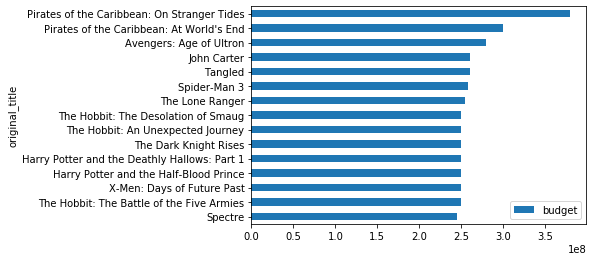

In [202]:
data[['original_title','budget']].nlargest(15, 'budget').sort_values(by=['budget'],ascending=True).plot(kind = 'barh', x = 'original_title', y='budget') #+

# 2. Какой из фильмов самый длительный (в минутах)?

In [203]:
answers['2'] = data[data['runtime']==data['runtime'].max()]['original_title'].item() #+ 

In [204]:
data[['imdb_id','original_title','runtime']].nlargest(5, 'runtime').style.highlight_max(color = 'lightgreen', axis = 0)

,imdb_id,original_title,runtime
1157,tt0279111,Gods and Generals,214
1081,tt0167260,The Lord of the Rings: The Return of the King,201
1736,tt0462322,Grindhouse,191
1336,tt0360717,King Kong,187
504,tt0213149,Pearl Harbor,183


# 3. Какой из фильмов самый короткий (в минутах)?





In [205]:
answers['3'] = data[data['runtime']==data['runtime'].min()]['original_title'].item() #+

In [206]:
data[['imdb_id','original_title','runtime']].nsmallest(5, 'runtime').style.highlight_min(color = 'lightblue', axis = 0)

,imdb_id,original_title,runtime
768,tt1449283,Winnie the Pooh,63
930,tt0280030,Return to Never Land,72
1097,tt0283426,The Jungle Book 2,72
1408,tt0361089,Valiant,76
1626,tt0299172,Home on the Range,76


# 4. Какова средняя длительность фильмов?


In [207]:
answers['4'] = round(data['runtime'].mean(),0)#+

In [208]:
round(data['runtime'].mean(),0)

110.0

# 5. Каково медианное значение длительности фильмов? 

In [209]:
answers['5'] = round(data['runtime'].median(),0)#+

In [210]:
round(data['runtime'].median(),0)

107.0

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [211]:
answers['6'] = data[data['profit']==data['profit'].max()]['original_title'].item() #+

In [212]:
data[['original_title','profit']].nlargest(5, 'profit').style.highlight_max(color = 'lightgreen', axis = 0)

,original_title,profit
239,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
0,Jurassic World,1363528810
4,Furious 7,1316249360
970,The Avengers,1299557910


# 7. Какой фильм самый убыточный? 

In [213]:
answers['7'] = data[data['profit']==data['profit'].min()]['original_title'].item() #+

In [214]:
data[['imdb_id','original_title','profit']].nsmallest(5, 'profit').style.highlight_min(color = 'lightblue', axis = 0)

,imdb_id,original_title,profit
1245,tt1210819,The Lone Ranger,-165710090
1616,tt0318974,The Alamo,-119180039
809,tt1305591,Mars Needs Moms,-111007242
958,tt0180052,The Adventures of Pluto Nash,-92896027
1464,tt0424095,Flushed Away,-84540684


# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [215]:
answers['8'] = data[data['revenue']>data['budget']]['imdb_id'].nunique() #+

In [216]:
data[data['revenue']>data['budget']]['imdb_id'].nunique()

1478

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [217]:
answers['9'] = data[(data['release_year'] == 2008)].nlargest(1, 'profit')['original_title'].item() #+

In [218]:
data[(data['release_year'] == 2008)][['original_title','profit']].nlargest(5, 'profit').style.highlight_max(color = 'lightgreen', axis = 0)

,original_title,profit
599,The Dark Knight,816921825
603,Indiana Jones and the Kingdom of the Crystal Skull,601636033
607,Mamma Mia!,557841637
606,Kung Fu Panda,501744560
621,Hancock,474029371


# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [219]:
answers['10'] = data[(data['release_year'] >= 2012)&(data['release_year'] <= 2014)].nsmallest(1, 'profit')['original_title'].item() #+

In [220]:
data[(data['release_year'] >= 2012)&(data['release_year'] <= 2014)][['original_title','profit']].nsmallest(5, 'profit').style.highlight_min(color = 'lightblue', axis = 0)

,original_title,profit
1245,The Lone Ranger,-165710090
1214,R.I.P.D.,-68351500
1007,Upside Down,-51893525
1302,Legends of Oz: Dorothy's Return,-51337973
1235,Bullet to the Head,-45510171


# 11. Какого жанра фильмов больше всего?

In [221]:
answers['11'] = data_per_genres.groupby(['genres'])['imdb_id'].nunique().nlargest(1).index.item() #+

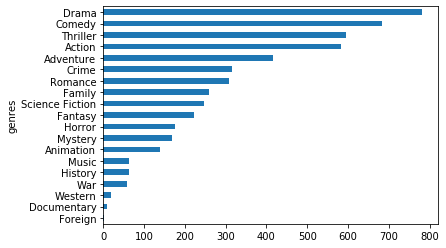

In [222]:
data_per_genres.groupby(['genres'])['imdb_id'].nunique().sort_values(ascending=True).plot(kind = 'barh', x = 'genres')

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [223]:
answers['12'] = data_per_genres[data_per_genres['profit']>0].groupby(['genres'])['imdb_id'].nunique().nlargest(1).index.item() #+

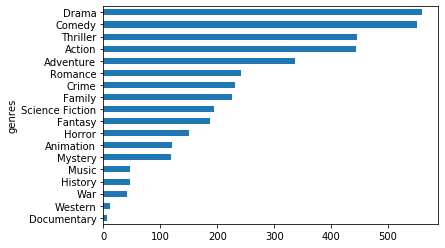

In [224]:
data_per_genres[data_per_genres['profit']>0].groupby(['genres'])['imdb_id'].nunique().sort_values(ascending=True).plot(kind = 'barh', x = 'genres')

# 13. У какого режиссера самые большие суммарные кассовые сбооры?

In [225]:
answers['13'] = data_per_director.groupby(['director'])['profit'].sum().nlargest(1).index.item() #+

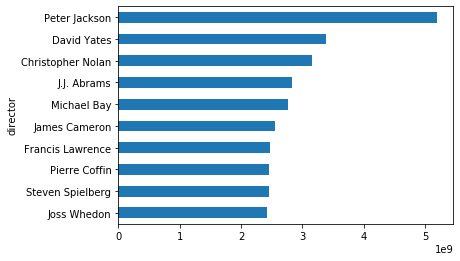

In [226]:
data_per_director.groupby(['director'])['profit'].sum().nlargest(10).sort_values(ascending=True).plot(kind = 'barh', x = 'director')

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [227]:
answers['14'] = data_per_director[data_per_director['genres_str'].str.contains('Action')].groupby(['director'])['imdb_id'].nunique().nlargest(1).index.item() #+

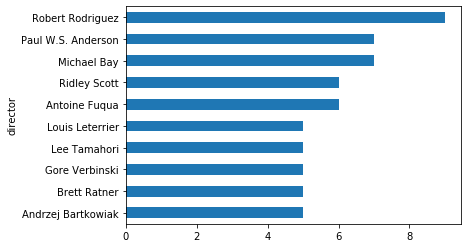

In [228]:
data_per_director[data_per_director['genres_str'].str.contains('Action')].groupby(['director'])['imdb_id'].nunique().nlargest(10).sort_values(ascending=True).plot(kind = 'barh', x = 'director')

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [229]:
answers['15'] = data_per_cast[data_per_cast['release_year'] == 2012].groupby(['cast'])['profit'].sum().nlargest(1).index.item() #+

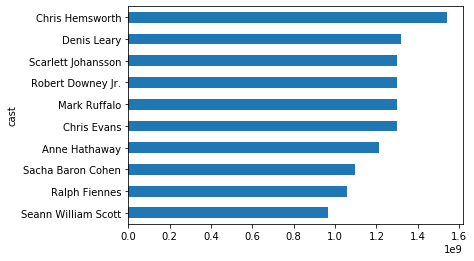

In [230]:
data_per_cast[data_per_cast['release_year'] == 2012].groupby(['cast'])['profit'].sum().nlargest(10).sort_values(ascending=True).plot(kind = 'barh', x = 'director')

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [231]:
answers['16'] = data_per_cast[data_per_cast['budget']>data['budget'].mean()].groupby(['cast'])['imdb_id'].nunique().nlargest(1).index.item() #+

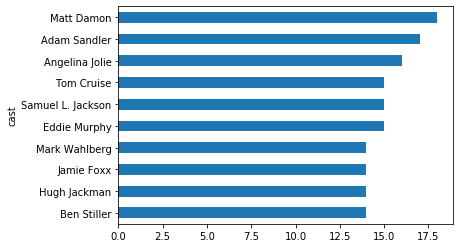

In [232]:
data_per_cast[data_per_cast['budget']>data['budget'].mean()].groupby(['cast'])['imdb_id'].nunique().nlargest(10).sort_values(ascending=True).plot(kind = 'barh', x = 'cast')

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [233]:
answers['17'] = data_per_genres[data_per_genres['cast_str'].str.contains('Nicolas Cage')].groupby(['genres'])['imdb_id'].nunique().nlargest(1).index.item() #+

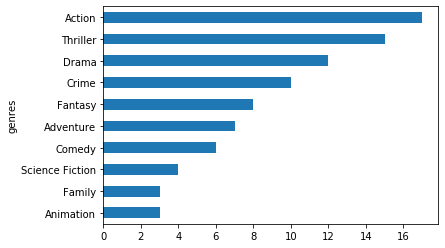

In [234]:
data_per_genres[data_per_genres['cast_str'].str.contains('Nicolas Cage')].groupby(['genres'])['imdb_id'].nunique().nlargest(10).sort_values(ascending=True).plot(kind = 'barh', x = 'genre')

# 18. Самый убыточный фильм от Paramount Pictures

In [235]:
answers['18'] = data[data['production_companies_str'].str.contains('Paramount Pictures')].groupby(['imdb_id','original_title'])['profit'].sum().nsmallest(1).index.item() #+

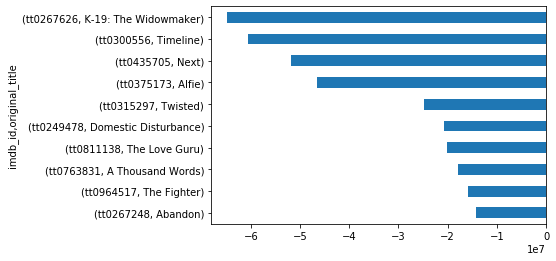

In [236]:
data[data['production_companies_str'].str.contains('Paramount Pictures')].groupby(['imdb_id','original_title'])['profit'].sum().nsmallest(10).sort_values(ascending=False).plot(kind = 'barh', x = 'original_title')

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [237]:
answers['19'] = data.groupby(['release_year'])['profit'].sum().nlargest(1).index.item() #+

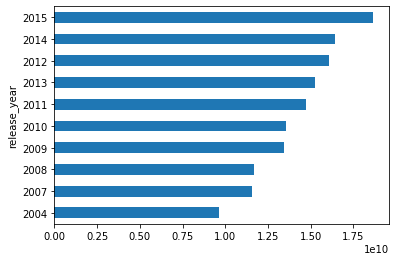

In [238]:
data.groupby(['release_year'])['profit'].sum().nlargest(10).sort_values(ascending=True).plot(kind = 'barh', x = 'release_year')

# 20. Какой самый прибыльный год для студии Warner Bros?

In [239]:
answers['20'] = data[data['production_companies_str'].str.contains('Warner Bros')].groupby(['release_year'])['profit'].sum().nlargest(1).index.item() #+

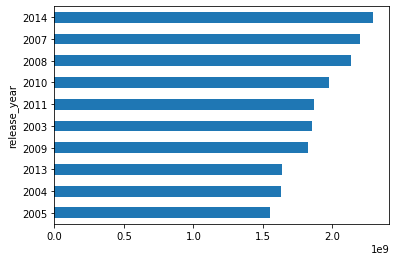

In [240]:
data[data['production_companies_str'].str.contains('Warner Bros')].groupby(['release_year'])['profit'].sum().nlargest(10).sort_values(ascending=True).plot(kind = 'barh', x = 'release_year')

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [241]:
answers['21'] = data.groupby(['release_month'])['imdb_id'].nunique().nlargest(1).index.item() #+

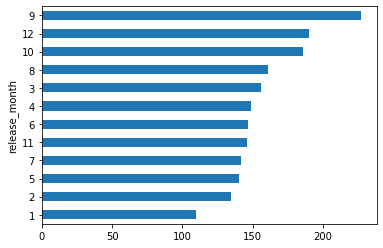

In [242]:
data.groupby(['release_month'])['imdb_id'].nunique().sort_values(ascending=True).plot(kind = 'barh', x = 'release_month')

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [243]:
answers['22'] = data[data['release_month'].isin([6,7,8])]['imdb_id'].nunique() #+

In [244]:
data[data['release_month'].isin([6,7,8])]['imdb_id'].nunique()

450

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [245]:
answers['23'] = data_per_director[data_per_director['release_month'].isin([12,1,2])].groupby(['director'])['imdb_id'].nunique().nlargest(1).index.item() #+

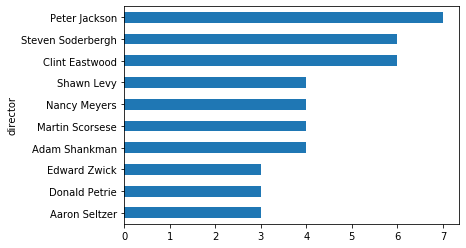

In [246]:
data_per_director[data_per_director['release_month'].isin([12,1,2])].groupby(['director'])['imdb_id'].nunique().nlargest(10).sort_values(ascending=True).plot(kind = 'barh', x = 'director')

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [247]:
answers['24'] = data_per_company.groupby(['production_companies'])['title_length'].mean().nlargest(1).index.item() #+

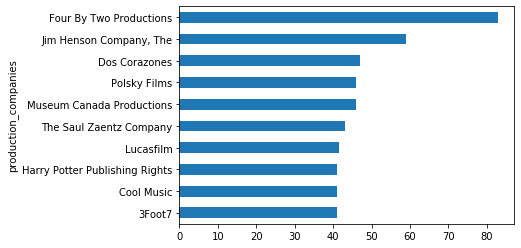

In [248]:
data_per_company.groupby(['production_companies'])['title_length'].mean().nlargest(10).sort_values(ascending=True).plot(kind = 'barh', x = 'production_companies')

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [249]:
answers['25'] = data_per_company.groupby(['production_companies'])['overview_lenght'].mean().nlargest(1).index.item() #+

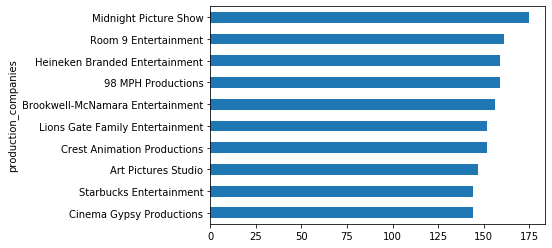

In [250]:
data_per_company.groupby(['production_companies'])['overview_lenght'].mean().nlargest(10).sort_values(ascending=True).plot(kind = 'barh', x = 'production_companies')

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [251]:
answers['26'] = data[data['vote_average']>data['vote_average'].quantile(0.99)]['original_title'].tolist() #+

In [252]:
data[data['vote_average']>data['vote_average'].quantile(0.99)][['imdb_id', 'original_title','vote_average']]

,imdb_id,original_title,vote_average
9,tt2096673,Inside Out,8.0
34,tt3170832,Room,8.0
118,tt0816692,Interstellar,8.0
119,tt2015381,Guardians of the Galaxy,7.9
125,tt2084970,The Imitation Game,8.0
128,tt2267998,Gone Girl,7.9
138,tt2278388,The Grand Budapest Hotel,7.9
370,tt1375666,Inception,7.9
599,tt0468569,The Dark Knight,8.1
872,tt0253474,The Pianist,7.9


# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [253]:
answers['27'] = df_tot[df_tot['cast_x'] != df_tot['cast_y']]['combocast'].value_counts().nlargest(5) #+

In [254]:
answers['27']

{Daniel Radcliffe, Emma Watson}        16
{Emma Watson, Rupert Grint}            16
{Daniel Radcliffe, Rupert Grint}       16
{Owen Wilson, Ben Stiller}             12
{Helena Bonham Carter, Johnny Depp}    12
Name: combocast, dtype: int64

ВАРИАНТ 2

In [255]:
pairs = Counter()

for actor in data['cast']:
    for pair in list(combinations(actor, 2)):
        pair_rev = pair[::-1]
        if pair_rev not in pairs and pair not in pairs:
            pairs[pair] = 1
        elif pair_rev in pairs:
            pairs[pair_rev] += 1
        else:
            pairs[pair] += 1
pairs.most_common(5)

[(('Daniel Radcliffe', 'Rupert Grint'), 8),
 (('Daniel Radcliffe', 'Emma Watson'), 8),
 (('Rupert Grint', 'Emma Watson'), 8),
 (('Ben Stiller', 'Owen Wilson'), 6),
 (('Johnny Depp', 'Helena Bonham Carter'), 6)]

# Submission

In [256]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

{'1': 'Pirates of the Caribbean: On Stranger Tides',
 '2': 'Gods and Generals',
 '3': 'Winnie the Pooh',
 '4': 110.0,
 '5': 107.0,
 '6': 'Avatar',
 '7': 'The Lone Ranger',
 '8': 1478,
 '9': 'The Dark Knight',
 '10': 'The Lone Ranger',
 '11': 'Drama',
 '12': 'Drama',
 '13': 'Peter Jackson',
 '14': 'Robert Rodriguez',
 '15': 'Chris Hemsworth',
 '16': 'Matt Damon',
 '17': 'Action',
 '18': ('tt0267626', 'K-19: The Widowmaker'),
 '19': 2015,
 '20': 2014,
 '21': 9,
 '22': 450,
 '23': 'Peter Jackson',
 '24': 'Four By Two Productions',
 '25': 'Midnight Picture Show',
 '26': ['Inside Out',
  'Room',
  'Interstellar',
  'Guardians of the Galaxy',
  'The Imitation Game',
  'Gone Girl',
  'The Grand Budapest Hotel',
  'Inception',
  'The Dark Knight',
  'The Pianist',
  'The Lord of the Rings: The Return of the King',
  'The Wolf of Wall Street',
  '12 Years a Slave',
  'Memento'],
 '27': {Daniel Radcliffe, Emma Watson}        16
 {Emma Watson, Rupert Grint}            16
 {Daniel Radcliffe, Ruper

In [257]:
# и убедиться что ни чего не пропустил)
len(answers)

27